## Read the data

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('data\song_data.csv')
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [3]:
df.shape

(18835, 15)

In [4]:
X=df[df.columns[2:]].values #song_popularity
y=df[df.columns[1]].values #other features

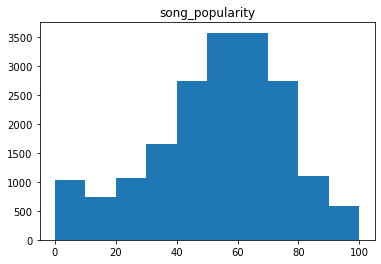

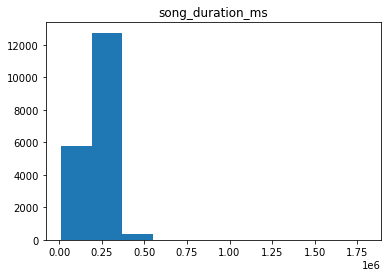

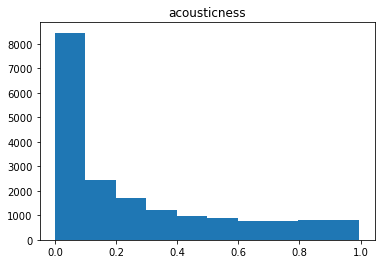

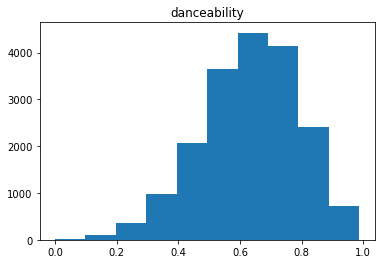

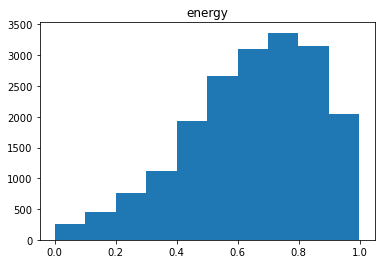

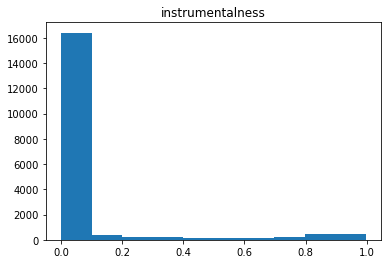

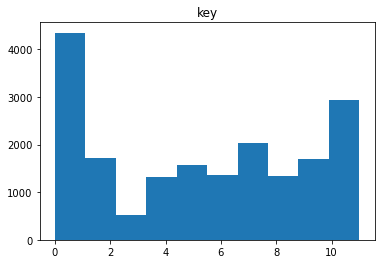

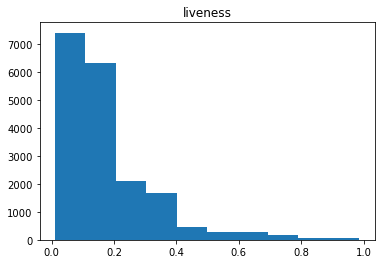

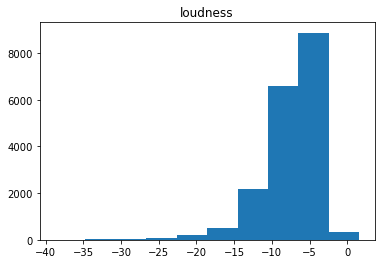

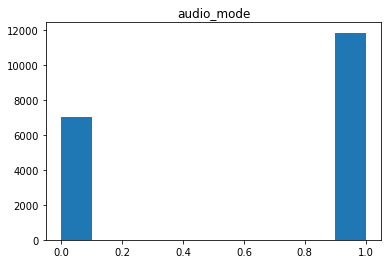

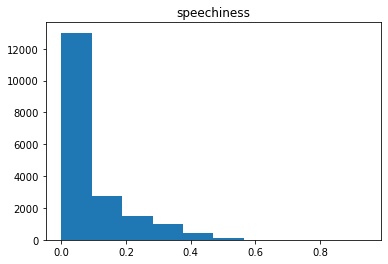

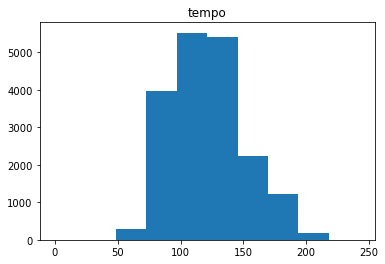

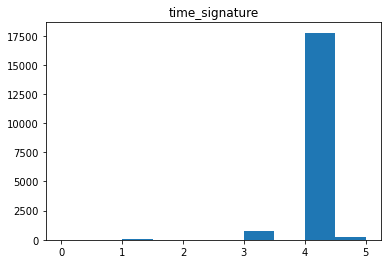

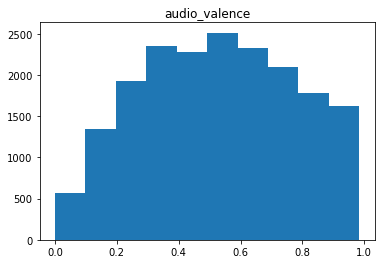

In [10]:
for i,feature in enumerate(df.columns[1:]):
    plt.hist(x=df[feature])
    plt.title(feature)
    plt.savefig(feature+'.png')
    plt.show()

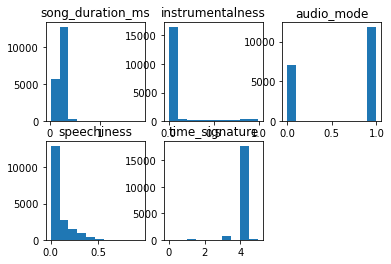

In [5]:
for i,feature in enumerate(df.columns[[2,6,10,11,13]]):
    plt.subplot(2,3,i+1)
    plt.hist(x=df[feature])
    plt.title(feature)
plt.show()

In [9]:
df.columns[1:][1]

'song_duration_ms'

In [8]:
popularity_percentile = 80
pop_crit = np.percentile(df['song_popularity'],popularity_percentile)
pop_crit

72.0

whether or not keep these feature, a large amout of data have the same features, so maybe don't have many information

In [ ]:
song_data["popularity"]= [ 1 if i>72 else 0 for i in song_data.song_popularity ]

## Regression

In [6]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from scipy import stats

Follow the professor's recomendation, we treat popularity greater than 60 as popular, less than 40 as unpopular, and leave out the remaining data 

In [7]:
df[df['song_popularity']>60].shape

(7638, 15)

In [8]:
df[df['song_popularity']<40].shape

(4490, 15)

In [9]:
con1=np.where(df['song_popularity']<40)[0]
con2=np.where(df['song_popularity']>60)[0]
index=np.concatenate((con1,con2))
index.shape

(12128,)

In [10]:
df1=df.loc[index]

In [11]:
X=df1[df1.columns[2:]].values #song_popularity
y=df1[df1.columns[1]].values #other features

In [12]:
X.shape

(12128, 13)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

lm=linear_model.LinearRegression()
model=lm.fit(X=X_train,y=y_train)

In [14]:
coef_dict={}
for i,feature in enumerate(df1.columns[2:]):
    coef_dict[feature]=model.coef_[i]

coef_dict

{'song_duration_ms': -1.6463296458382628e-05,
 'acousticness': -6.302990494677968,
 'danceability': 19.860679557395446,
 'energy': -15.545162492036035,
 'instrumentalness': -19.16558397048843,
 'key': -0.11585762860577502,
 'liveness': -6.825107855878207,
 'loudness': 1.0213786628515382,
 'audio_mode': 0.5073412334086417,
 'speechiness': -5.117876857838808,
 'tempo': -0.00936104418679746,
 'time_signature': 1.44635062204758,
 'audio_valence': -12.45581106867642}

In [15]:
df1.columns[2:]

Index(['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence'],
      dtype='object')

In [16]:
model.score(X=X_test,y=y_test)

0.07531700919676232

In [17]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load data
dat = df

# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('song_popularity~song_duration_ms+acousticness+danceability+energy+instrumentalness+key+liveness+loudness+audio_mode+speechiness+tempo+time_signature+audio_valence', data=dat).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        song_popularity   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     70.09
Date:                Fri, 04 Dec 2020   Prob (F-statistic):          7.07e-182
Time:                        16:29:38   Log-Likelihood:                -84419.
No. Observations:               18835   AIC:                         1.689e+05
Df Residuals:                   18821   BIC:                         1.690e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           62.3520      2.768  